## World Series Odds Problem

$p$: probability that team A wins a game between team and B
$q=(1-p)$: probability that team B wins

Suppose A and B play a series until one wins $n$ games.

Denote $P(i,j)$ as the probability that A wins the series when:
  A needs to win $i$ more games
  B needs to win $j$ more games
  
**Question**: What's the probability that team A wins a best-of-seven series?

**Answer**:$P(4,4)$

Let's solve this problem recursively!

**Question**: What's the probability that A wins the series when B needs 0 more games to win?$P(i,0)=0$

**Question**: What's the probability that A wins the series when A needs 0 more games to win?$P(0,j)=1.$

**Question**: What's the probability that A wins the series when both teams need to win one more game? $P(1,1)=p$

**Question**: What's the probability that A wins the series when A needs $i$ more wins and B needs $j$ more wins? $P(i,j) = p \times P(i-1,j) + q \times P(i,j-1)$ 



In [1]:
import numpy as np

def worldseriesodds(n, awins):
    bwins = 1. - awins
    # allocate matrix
    p = np.zeros((n+1,n+1))
    # initialize
    for i in xrange(n+1):
        p[i,0] = 0.
    for j in xrange(n+1):
        p[0,j] = 1.
    # do recursive computation
    for i in xrange(1,n+1):
        for j in xrange(1, n+1):
            p[i,j] = awins * p[i-1,j] + bwins * p[i,j-1]
    # return answer
    return p[n,n]
    

In [2]:
print worldseriesodds(4, .8)

0.966656


In [3]:
print worldseriesodds(2, .8)

0.896


In [18]:
set_probs = np.linspace(0.5,1,num=50)
seven_game_probs = [worldseriesodds(3, p) for p in set_probs]
five_game_probs = [worldseriesodds(2,p) for p in set_probs]

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


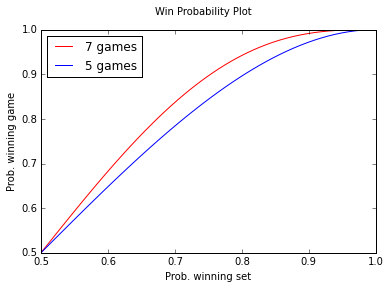

In [35]:
fig, ax = subplots()
ax.plot(set_probs,seven_game_probs, 'r', label="7 games")
ax.plot(set_probs, five_game_probs, 'b', label="5 games")
ax.set_xlabel("Prob. winning set")
ax.set_xlim(0.5,1.)
ax.set_ylabel("Prob. winning game")
ax.set_ylim(0.5,1.)
ax.legend(loc="best")
fig.suptitle("Win Probability Plot")